# This is a visualization of usage over time fo the Toronto Bike data available through Open Data from the City of Toronto

## Historical data can be found: https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/

In [5]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
	
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "7e876c24-177c-4605-9cef-e50dd74c617f"}
package = requests.get(url, params = params).json()

'''
#print the available files, their format, size, and ID
print("Available Datasets\n")
print("name\t", "format\t\t", "size\t\t", "ID")
print("----------------------------------------------------------------------------------")
for d in (package["result"]['resources']):
    print(d['name'], d["format"], d['size'],d['id'])
'''
#Accessing of dataset Bike share ridership 2021-01
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/7e876c24-177c-4605-9cef-e50dd74c617f/resource/d4a7b25c-edd0-4c1b-954a-79b6559477c4/download/2021-01.csv"
params = { "pkg": "7e876c24-177c-4605-9cef-e50dd74c617f", "res":"d4a7b25c-edd0-4c1b-954a-79b6559477c4"}
data = requests.get(url).content
decoded_data = data.decode("ISO-8859-1")
d = pd.read_csv(io.StringIO(decoded_data), sep = ",")

#Print column names
print(d.columns)

#Convert to datetime and add column called "Length" for duration of trip
d['Start Time'] = pd.to_datetime(d['Start Time'], format = "%m/%d/%Y %H:%M")
d['End Time'] = pd.to_datetime(d['End Time'], format = "%m/%d/%Y %H:%M")
d["Length"] = d['End Time'] - d['Start Time']
d["Length"] = d["Length"].astype('timedelta64[m]')


Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')


#### Define simple numerical data histogram plotting function

In [63]:
def HistPlot(data, text_size, ylabel, xlabel, title, xrot, **kwargs):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel, size = text_size)
    ax.set_ylabel(ylabel, size = text_size)
    ax.set_title(title, size = text_size+2)
    data.plot(**kwargs, fontsize = text_size, ax = ax)
    plt.xticks(rotation=xrot)
    return()

Plot a histograms of trip duration, start location, and end location

()

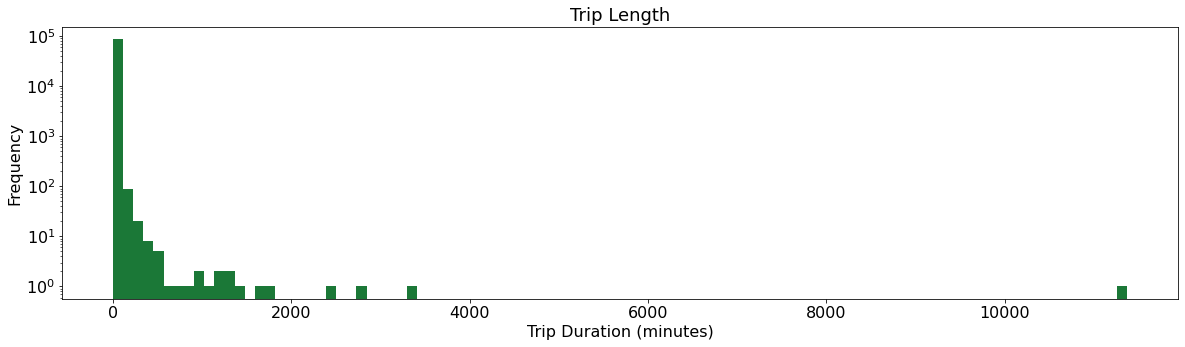

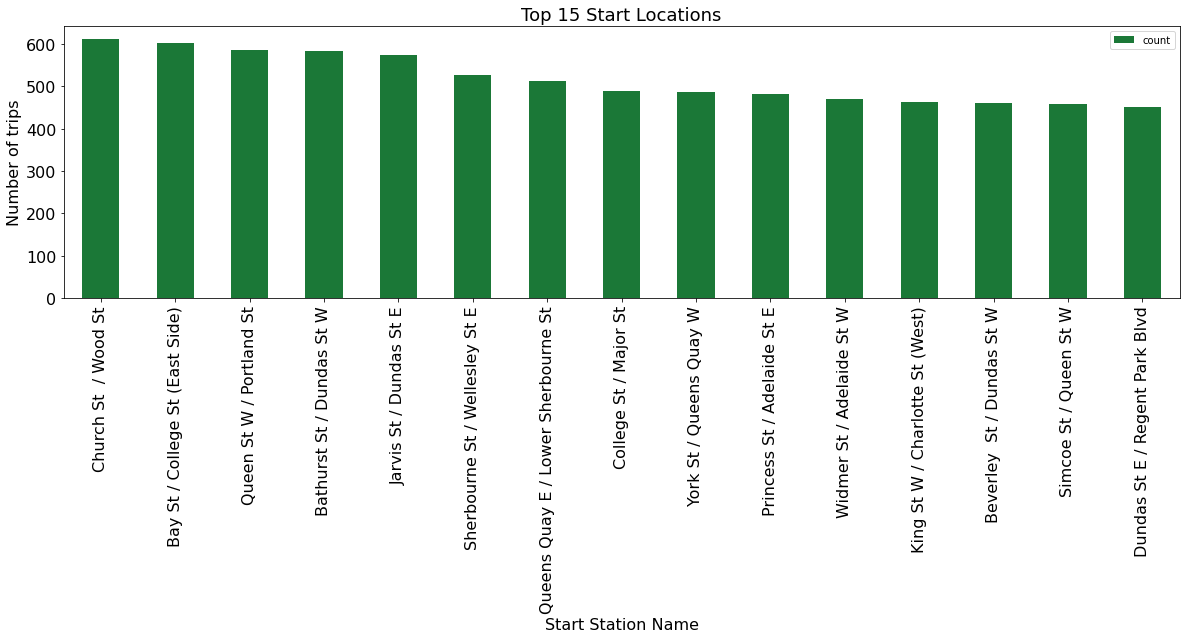

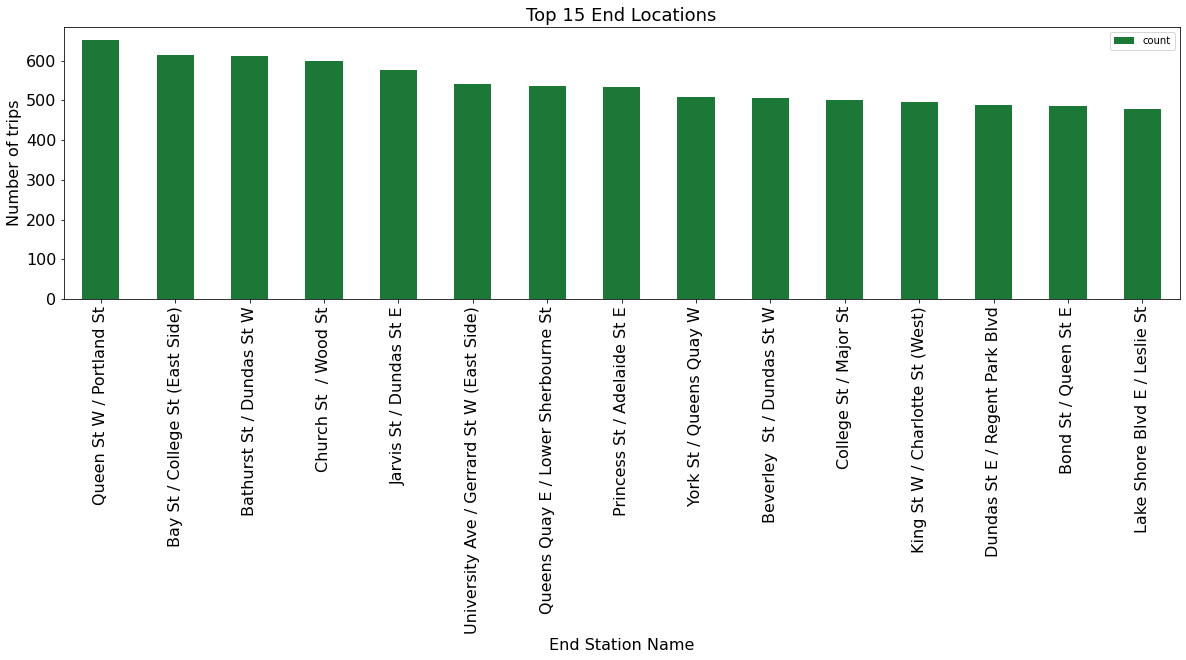

In [64]:
#Plot duration histrogram (maybe someone stole a bike....)
HistPlot(d["Length"], 16, "Number of Trips", "Trip Duration (minutes)","Trip Length", 0, kind = "hist", bins = 100, color = "#1b7837", figsize = (20,5), logy = True)

#Plot trip start location
df = d.groupby(["Start Station Name"]).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
df.columns = ["Start Station Name", 'count']
HistPlot(df, 16, "Number of trips", "Start Location Name", "Top 15 Start Locations",90, kind = "bar", x="Start Station Name", y = "count", color = "#1b7837", figsize = (20,5))

#Plot trip end location
df = d.groupby(["End Station Name"]).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
df.columns = ["End Station Name", 'count']
HistPlot(df, 16, "Number of trips", "End Location Name","Top 15 End Locations", 90, kind = "bar", x="End Station Name", y = "count", color = "#1b7837", figsize = (20,5))#, xrot=4